In [ ]:
!pip install requests==2.30.0

import requests
import pandas as pd

url = "http://ergast.com/api/f1/2023/driverStandings.json"
response = requests.get(url)
data = response.json()



In [ ]:
driver_standings = data['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
df = pd.DataFrame(driver_standings)
df

,position,positionText,points,wins,Driver,Constructors
0,1,1,575,19,"{'driverId': 'max_verstappen', 'permanentNumbe...","[{'constructorId': 'red_bull', 'url': 'http://..."
1,2,2,285,2,"{'driverId': 'perez', 'permanentNumber': '11',...","[{'constructorId': 'red_bull', 'url': 'http://..."
2,3,3,234,0,"{'driverId': 'hamilton', 'permanentNumber': '4...","[{'constructorId': 'mercedes', 'url': 'http://..."
3,4,4,206,0,"{'driverId': 'alonso', 'permanentNumber': '14'...","[{'constructorId': 'aston_martin', 'url': 'htt..."
4,5,5,206,0,"{'driverId': 'leclerc', 'permanentNumber': '16...","[{'constructorId': 'ferrari', 'url': 'http://e..."
5,6,6,205,0,"{'driverId': 'norris', 'permanentNumber': '4',...","[{'constructorId': 'mclaren', 'url': 'http://e..."
6,7,7,200,1,"{'driverId': 'sainz', 'permanentNumber': '55',...","[{'constructorId': 'ferrari', 'url': 'http://e..."
7,8,8,175,0,"{'driverId': 'russell', 'permanentNumber': '63...","[{'constructorId': 'mercedes', 'url': 'http://..."
8,9,9,97,0,"{'driverId': 'piastri', 'permanentNumber': '81...","[{'constructorId': 'mclaren', 'url': 'http://e..."
9,10,10,74,0,"{'driverId': 'stroll', 'permanentNumber': '18'...","[{'constructorId': 'aston_martin', 'url': 'htt..."


In [ ]:
import requests
import pandas as pd
from datetime import datetime

In [1]:
import requests
import pandas as pd
from datetime import datetime, date

def fetch_race_results(year):
    url = f"http://ergast.com/api/f1/{year}/results.json?limit=1000"
    response = requests.get(url)
    data = response.json()
    races = data['MRData']['RaceTable']['Races']
    race_results = []
    for race in races:
        for results in race['Results']:
            driver_id = results['Driver']['driverId']
            driver_dob_url = f"http://ergast.com/api/f1/drivers/{driver_id}.json"
            driver_dob_response = requests.get(driver_dob_url)
            driver_dob_data = driver_dob_response.json()
            dob = driver_dob_data['MRData']['DriverTable']['Drivers'][0]['dateOfBirth']  # Get driver's date of birth


            race_results.append({
                'year': year,
                'driver_id': driver_id,
                'position': int(results['position']),
                'dob': dob,
            })

    return race_results

all_results = []
for year in range(2000, 2023):
    all_results.extend(fetch_race_results(year))

df = pd.DataFrame(all_results)



In [2]:
df.head().isnull().sum()

,0
year,0
driver_id,0
position,0
dob,0


In [3]:
df.dropna()

,year,driver_id,position,dob
0,2000,michael_schumacher,1,1969-01-03
1,2000,barrichello,2,1972-05-23
2,2000,ralf_schumacher,3,1975-06-30
3,2000,villeneuve,4,1971-04-09
4,2000,fisichella,5,1973-01-14
...,...,...,...,...
2295,2022,kevin_magnussen,16,1992-10-05
2296,2022,vettel,17,1987-07-03
2297,2022,gasly,18,1996-02-07
2298,2022,norris,19,1999-11-13


In [5]:
df.fillna(0)

,year,driver_id,position,dob
0,2000,michael_schumacher,1,1969-01-03
1,2000,barrichello,2,1972-05-23
2,2000,ralf_schumacher,3,1975-06-30
3,2000,villeneuve,4,1971-04-09
4,2000,fisichella,5,1973-01-14
...,...,...,...,...
2295,2022,kevin_magnussen,16,1992-10-05
2296,2022,vettel,17,1987-07-03
2297,2022,gasly,18,1996-02-07
2298,2022,norris,19,1999-11-13


In [6]:
import pandas as pd
from datetime import datetime, date

#calculate driver age
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))



df['driver_age'] = pd.to_datetime(df['dob']).apply(lambda x: calculate_age(x))



# column indicating podium finish (top 3)
df['podium_finish'] = df['position'].apply(lambda x: 1 if x <= 3 else 0)

# drivers older than 35
older_drivers_df = df[df['driver_age'] > 35]

# finish rate for older drivers
older_drivers_podium_rate = older_drivers_df['podium_finish'].sum() / len(older_drivers_df)

# data for drivers 35 or younger
younger_drivers_df = df[df['driver_age'] <= 35]

# finish rate for younger drivers
younger_drivers_podium_rate = younger_drivers_df['podium_finish'].sum() / len(younger_drivers_df)


print(f"Podium finish rate for drivers older than 35: {older_drivers_podium_rate}")
print(f"Podium finish rate for drivers 35 or younger: {younger_drivers_podium_rate}")




Podium finish rate for drivers older than 35: 0.17755856966707767
Podium finish rate for drivers 35 or younger: 0.08997050147492626


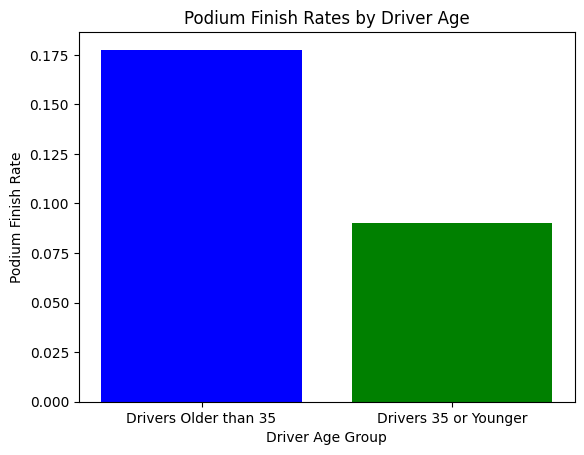

In [7]:
import matplotlib.pyplot as plt
import numpy as np


groups = ['Drivers Older than 35', 'Drivers 35 or Younger']
podium_rates = [older_drivers_podium_rate, younger_drivers_podium_rate]


plt.bar(groups, podium_rates, color=['blue', 'green'])


plt.xlabel('Driver Age Group')
plt.ylabel('Podium Finish Rate')
plt.title('Podium Finish Rates by Driver Age')


plt.show()

<ipython-input-12-645695b245a7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  podium_rates_by_year = df.groupby(['year', pd.cut(df['driver_age'], bins=[0, 35, float('inf')], labels=['Drivers 35 or Younger', 'Drivers Older than 35'])])['podium_finish'].mean().reset_index()


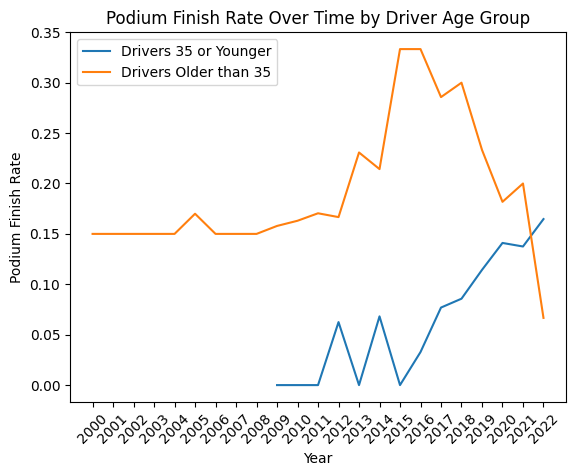

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by year and driver age, calculate average podium finish rate
podium_rates_by_year = df.groupby(['year', pd.cut(df['driver_age'], bins=[0, 35, float('inf')], labels=['Drivers 35 or Younger', 'Drivers Older than 35'])])['podium_finish'].mean().reset_index()

# Convert year to integer for proper plotting
podium_rates_by_year['year'] = podium_rates_by_year['year'].astype(int)

# Create the line graph with two lines
fig, ax = plt.subplots()
for age_group in podium_rates_by_year['driver_age'].unique():
    group_data = podium_rates_by_year[podium_rates_by_year['driver_age'] == age_group]
    ax.plot(group_data['year'], group_data['podium_finish'], label=age_group)

ax.set_xlabel('Year')
ax.set_ylabel('Podium Finish Rate')
ax.set_title('Podium Finish Rate Over Time by Driver Age Group')
ax.legend()
ax.set_xticks(podium_rates_by_year['year'].unique())
plt.xticks(rotation=45)
plt.show()

In [14]:
import scipy.stats as stats


older_drivers_podium_rate = older_drivers_df['podium_finish']
younger_drivers_podium_rate = younger_drivers_df['podium_finish']

# two-sample t-test
t_statistic, p_value = stats.ttest_ind(
    older_drivers_podium_rate, younger_drivers_podium_rate
)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in podium finish rates between the two age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in podium finish rates between the two age groups.")

T-statistic: 5.369406045438965
P-value: 8.694085695753923e-08
Reject the null hypothesis. There is a significant difference in podium finish rates between the two age groups.
